# Исследование успешности продажи компьютерных игр

- Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
--- 
- Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
--- 
Данные за 2016 год могут быть неполными.

 **План работы:**

1. Открыть файл с данными и изучить общую информацию. Данные для исследования получить из файла: /datasets/games.csv.

2. Выполнить предобработку данных.

3. Проведение исследовательского анализа данных.

4. Составить портрет пользователя каждого региона.

5. Проверить гипотезы.

6. Написать общий вывод.


***Импорт библиотек***

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# Шаг 1. Загрузка данных. Общая информация

***Загружаем данные из csv-файла в датафрейм***

In [10]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Выводы по 1 пункту

- Были проанализированны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

    - всего в датафрейме 16715 строк и 11 колонок. Обнаружены пропуски в шести колонках:Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;

    - название колонок имеют нарушение стиля. Их необходимо привести к виду snake_case;

    - неверный тип данных в столбцах Year_of_Release, User_Score.

# Шаг 2. Предобработка данных

#####  Замена названия столбцов

Приведем название столбцов к нижнем регистру методом str.lower().

In [17]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Иногда пишут длинный словарь для замены колонок, как в проекте по музыке.</font>

##### Преобразование данных к нужным типам

Преобразуем тип данных  в столбце year_of_release из float к int. Так как год может быть только целым числом. Так как в данных присутствуют пропуски - посчитаем их количество пропусков в процентах.

In [21]:
data['year_of_release'].isna().sum() / len(data['name'])*100

1.609332934489979

Так как пропусков немного: менее 2 процентов. Удалим их.

In [23]:
data = data.dropna(subset=['year_of_release'])


In [24]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].dtypes

dtype('int32')

Преобразуем тип данных  в столбце user_score из object к float. Так как столбец содержит числа с плавающей точкой. Так как при преобразовании типа данных выходит ошибка, из-за присутсвия строковых значений 'tbd' и этих значений много: более 40 процентов, заменим значения 'tbd'  в столбце на NaN методом replace().

In [26]:
data['user_score'].isna().sum() / len(data['name'])*100

40.1739024686854

In [27]:
data = data.replace({'tbd':np.nan})

In [28]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].dtypes

dtype('float64')

Проверим тип данных в столбцах

In [30]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

##### Обработка пропусков

Проверим количество пропусков

In [33]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Рассчитаем количество пропусков в процентах

In [35]:
percent = data.isna().sum() * 100 / len(data)
print(percent.round(3))

name                0.012
platform            0.000
year_of_release     0.000
genre               0.012
na_sales            0.000
eu_sales            0.000
jp_sales            0.000
other_sales         0.000
critic_score       51.459
user_score         54.621
rating             40.606
dtype: float64


**Обработка пропусков в столбцах name и genre**

Так как в этих столбцах всего по два пропуска (менее 1 %) и эти пропуски не числовые т.е. их не заменить, то предлагаю удалить эти пропуски. Причина возникновения пропусков - скорее всего это случайные пропуски, так как в них содержится базовая информация: название инры и жанр игры.

In [38]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

Проверим удаление пропусков

In [40]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**Обработка пропусков в столбцах critic_score, user_score, rating**

В этих столбцах пропусков от 40 до 55 % процентов. Это слишком много, поэтому удалять их нельзя. Данные в стобцах характеризуют оценку критиков, оценку пользователей и возрастной рейтинг от организации ESRB. Пропуски в  столбцах critic_score и user_score   возникли, скорее всего, из-за того что некоторые игры новые или слишком малоизвестные, поэтому оценку критиков или пользователей не успели получить. Пропуски с столбце rating возникли из-за того что в данных есть япониские игры, которые не оцениваются американским рейтингом ESRB. Предлагаю оставить пропуски в столбцах critic_score, user_score; а в столбце rating заполнить пропущенные значения "без рейтинга ESRB". 

In [43]:
data['rating'] = data['rating'].fillna('без рейтинга ESRB')

Проверим удаление пропусков

In [45]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

##### Обработка дубликатов

**Определим количество явных дубликатов**

In [48]:
data.duplicated().sum()

0

**Поиск по неявным дубликатам по столбцам с названием игр и платформы**

In [50]:
# Создадим копию датасета до преобразования
temp = data.copy() 

In [51]:
data.duplicated(['name', 'platform']).sum()

3

In [52]:
# Посмотрим на эти дубликаты
display(temp[temp[['name', 'platform']].duplicated(keep=False)])
print('На самом деле в датасете один неявный дуликат, а не два.')
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


На самом деле в датасете один неявный дуликат, а не два.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим эти дубликаты. Проверим, что неявных дубликатов больше нет.

In [54]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])

data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

##### Расчет суммарных продаж во всех регионах

Добавляем новый столбец total sales в датафрейм data с суммарными продажами во всех регионах. Проверяем получившийся датафрейм.

In [57]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга ESRB,31.38


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


# Выводы по 2 пункту

- Была выпонена предобработка данных в ходе которой:

    -  название столбцов были приведены к нижнему регистру;
    
    - типы данных в двух столбцах: year_of_release и user_score были изменены на верные;

    - проанализировали пропуски в пяти столбцах: name, genre, critic_score, user_score, rating. Пропуски в столбцах name и genre удалили, так как их менее 1 процента. Пропуски в стобце rating заменили на "без рейтинга ESRB", так как эти данные имеют большое количесво пропусков и удалять их нельзя и в дальнейшем участвуют в исследовательском анализе. Пропуски в столбцах critic_score, user_score оставили без изменений.
    
    - проверили данные на явные дубликаты. Обработали данные на неявные дубликаты в столбцах name, platform, year_of_release.
    
    - добавлен новый столбец total_sales в датафрейм data с суммарными продажами во всех регионах.

# Шаг 3. Исследовательский анализ данных

##### Сколько игр выпускалось в разные годы

Считаем количество игр выпущенных в разные годы

In [64]:
data_games_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count') 
data_games_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


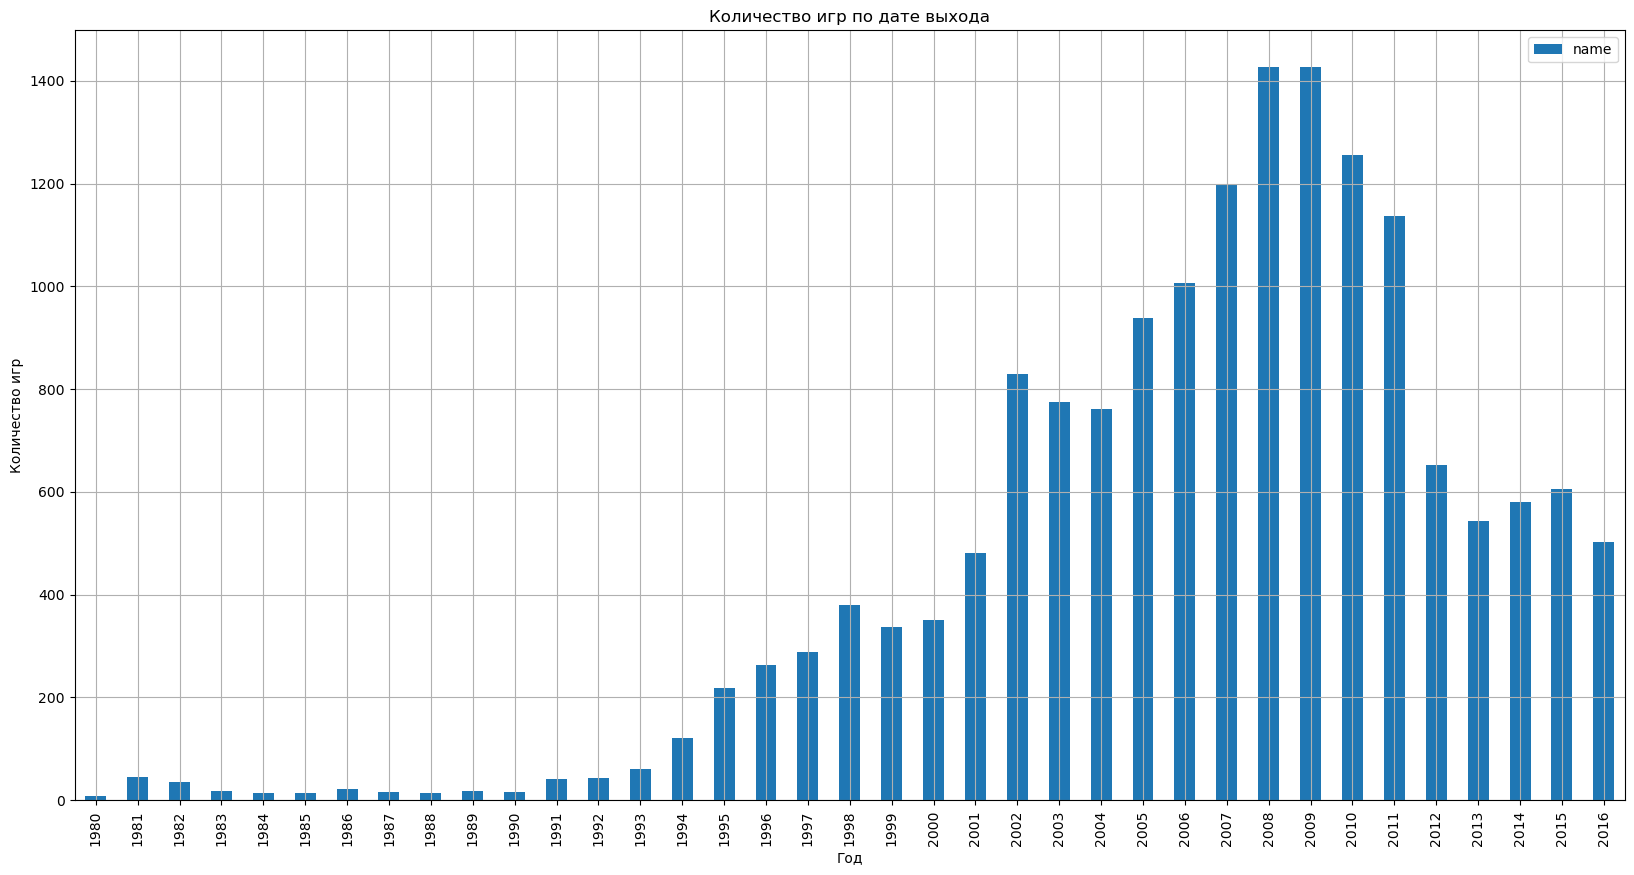

In [65]:
data_games_year.reset_index().plot.bar(x='year_of_release', y='name', figsize=(20, 10), grid=True)
plt.title('Количество игр по дате выхода')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

**Выводы:**

- В данных предоставлены игры, выпущенные с 1980 по 2016 года;

- С 1980 по 1994 года зарождение индустрии компьютерных игр, выпуск игр не превышает 200;

- Рост числа игр начинается с 1995 года. Пик приходится на 2008 - 2009 года;

- С 2010 года начинается спад выпуска игр, который стабилизируется к 2012 году.

- Для исследования предлагаю взять период с 2012 года. так как в нем нет явных пиков и спадов и он находится ближе к 2017 году.

##### Как менялись продажи по платформам

**Платформы с наибольшими суммарными продажами**

Делаем сводную таблицу по продажам и сортируем по убыванию

In [70]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)

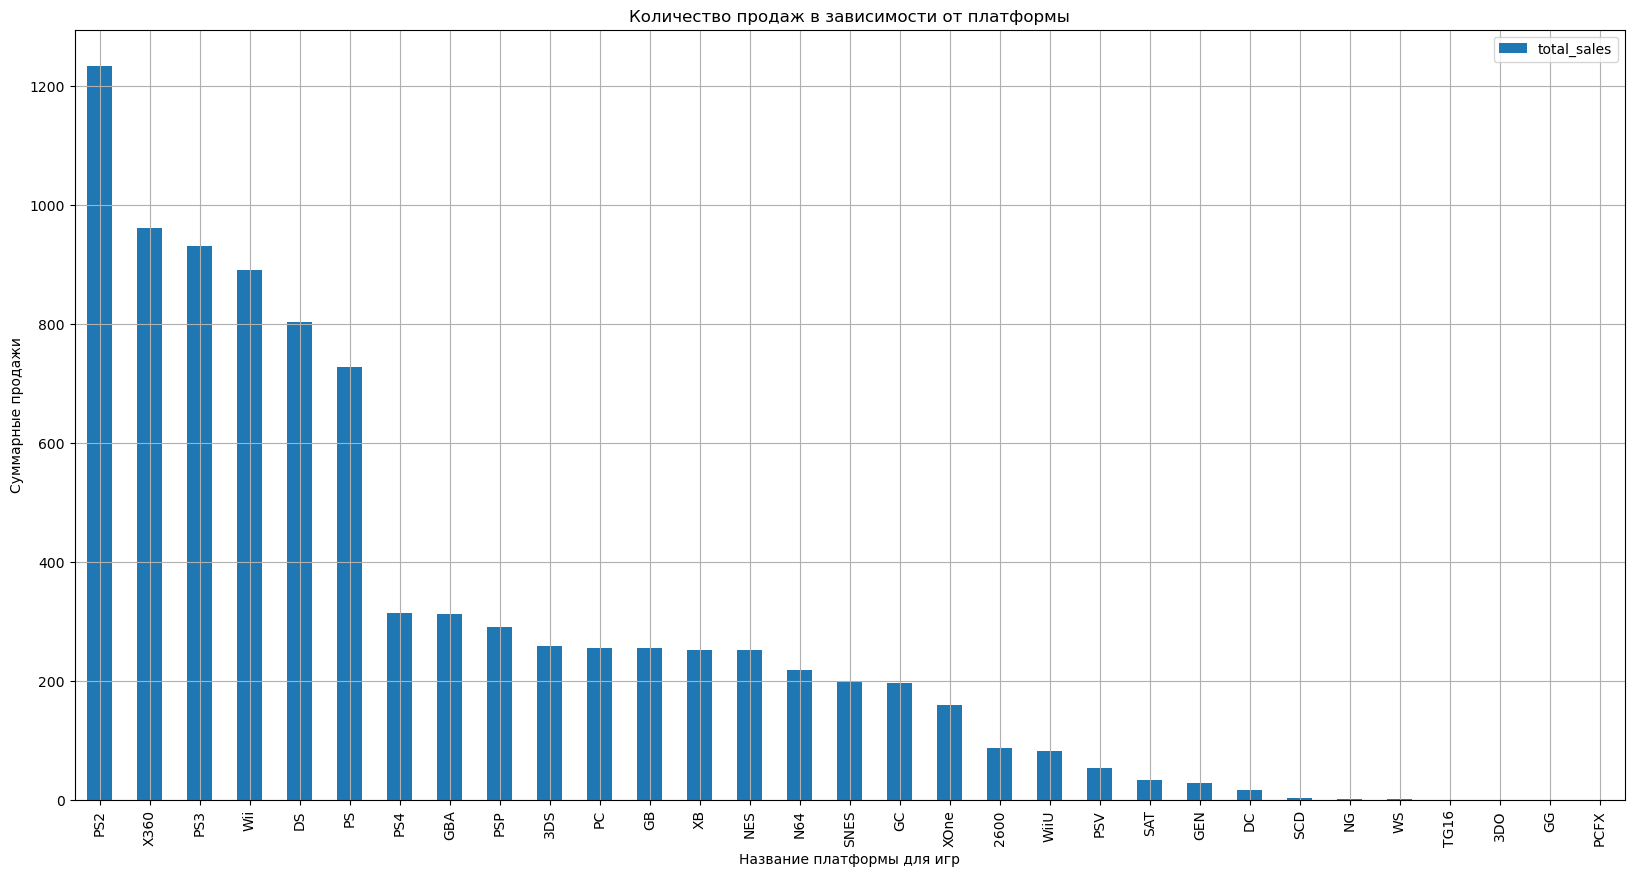

In [71]:
sales_by_platform.plot(kind='bar' , grid=True, figsize=(20, 10))
plt.title('Количество продаж в зависимости от платформы')
plt.xlabel('Название платформы для игр')
plt.ylabel('Суммарные продажи')
plt.show()

Лидерами по продажам являются шесть платформ: PS2, X360, PS3, Wii, DS, PS.

**Расспределение продаж по годам**

Для дальнейшего исследования выделим ТОП-10 платформ по продажам.

In [75]:
top_10_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)\
.reset_index().head(10)['platform'].tolist()
top_10_platform 

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Создадим цикл для построения графика ТОП-10 платформ по продажам 

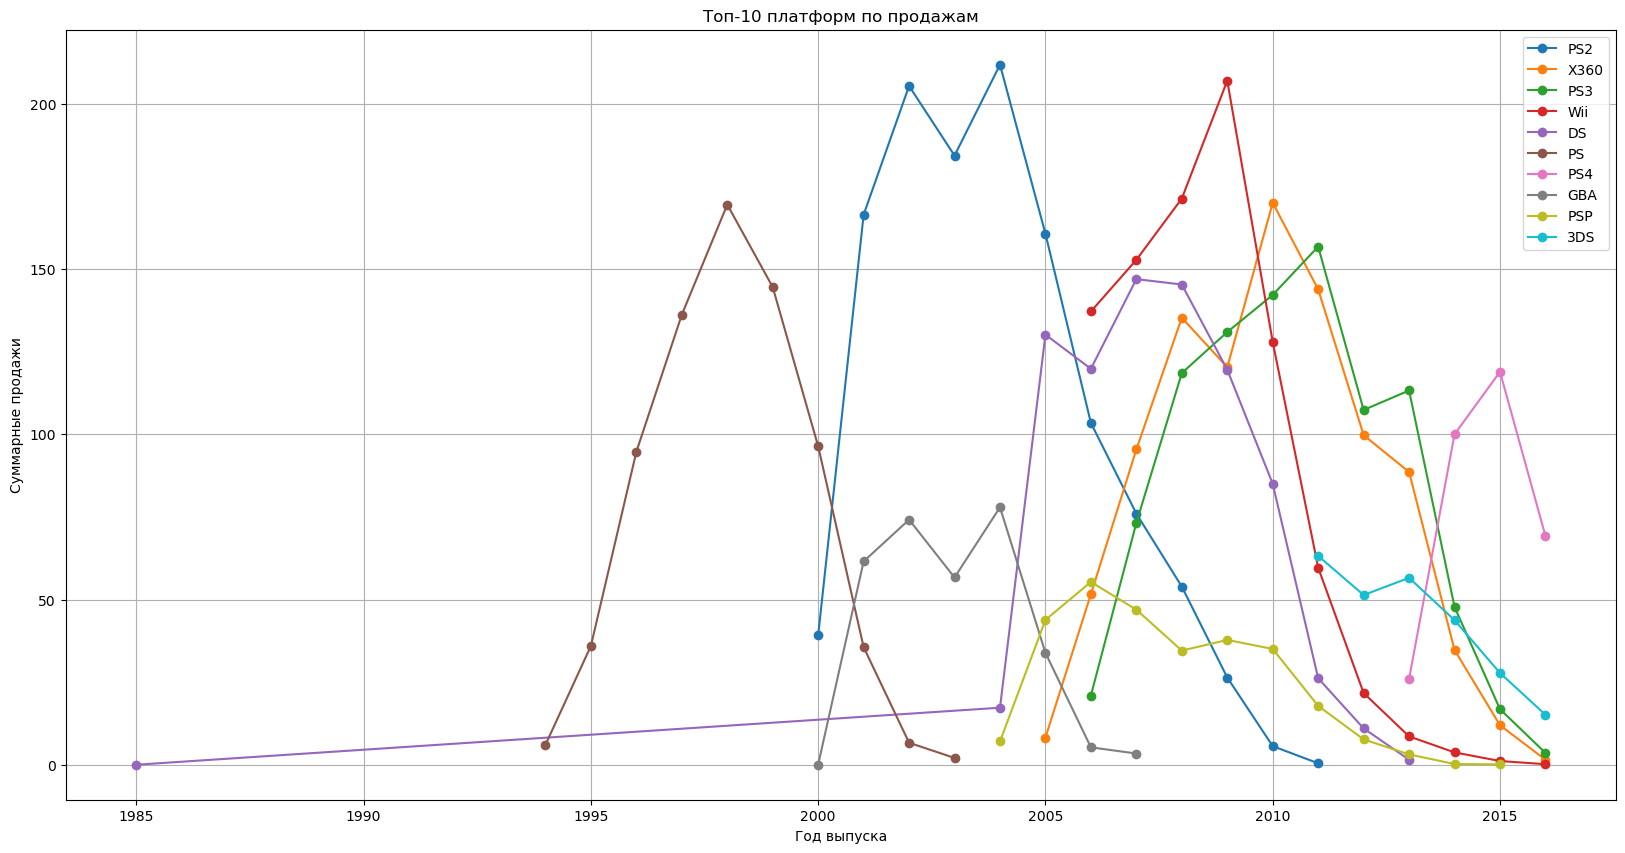

In [77]:
for name in top_10_platform :
    (
    data.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 10), label=name, style='o-', grid=True)
    )
    plt.title('Топ-10 платформ по продажам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 


У платформы DS на графике видна аномалия: игра, выпущенная 1985 году. Из справочных данных: "Nintendo DS. Консоль была выпущена в 2004 году в Канаде, США и Японии". 

Проанализируем эту аномалию.

In [79]:
data.loc[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,без рейтинга ESRB,0.02


В данных только одна строка. Удалим ее и перестроим график ТОП-10 платформ по продажам.

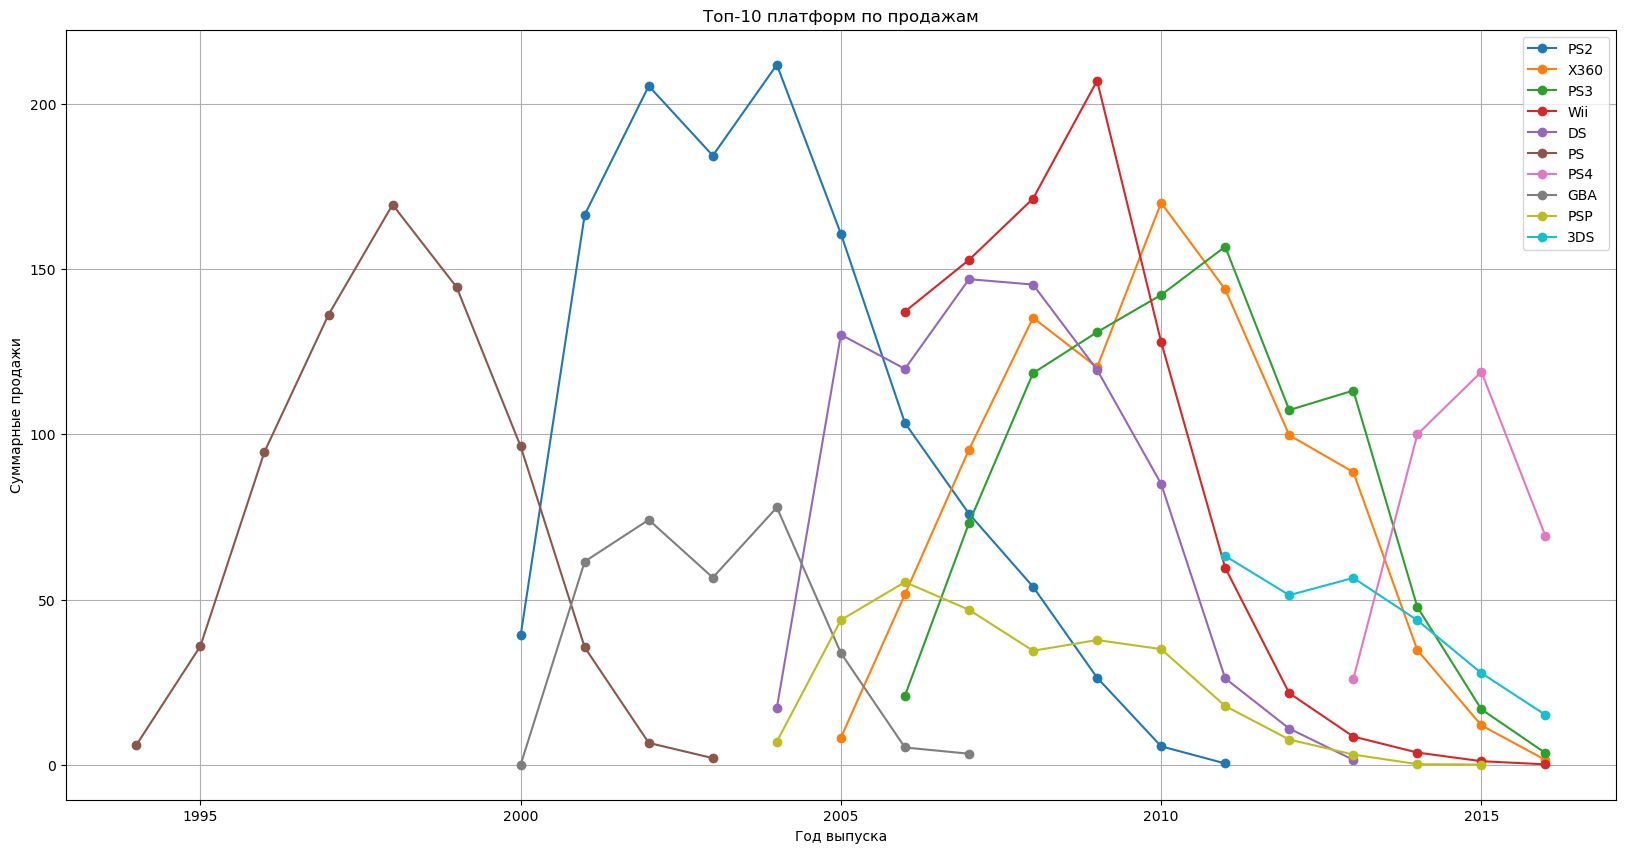

In [81]:
data = data.drop(index=15957)


for name in top_10_platform :
    (
    data.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 10), label=name, style='o-', grid=True)
    )
    plt.title('Топ-10 платформ по продажам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

В общем видна общая тенденция снижения суммарных продаж по платформам. К 2016 году продажи есть только у пяти платформ: PS4, 3DS, PS3, X360, Wii. 

**Срок за который появляются новые и исчезают старые платформы**

Составим сводную таблицу, которая покажет количество уникальных годов выпуска игр для каждой платформы.

In [85]:
platform_age = data.pivot_table(index='platform', values='year_of_release', aggfunc='nunique')
platform_age

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,10
GB,13
GBA,8
GC,7
GEN,5


Расчитаем средний возраст платформы:

In [87]:
# Средний возраст платформы
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 
time_life['life'].median()

7.0

Таким образом, каждые 7 лет появляются новые и исчезают старые платформы.

**Выводы:**

- Лидерами по суммарным продажам являются шесть платформ: PS2, X360, PS3, Wii, DS, PS;

- В общем видна общая тенденция снижения суммарных продаж по платформам. К 2016 году продажи есть только у пяти платформ: PS4, 3DS, PS3, X360, Wii;

- Каждые 7 лет появляются новые и исчезают старые платформы. 

##### Выбор актуального периода для исследования

Для исследования предлагаю взять период начинаю с 2012 года, так как он близок 2017 году (который мы будем прогнозировать) и в нем нет явных пиков и спадов как в предыдущих годах

Для дальнейшего исследования оставим датафрейме информацию только начиная с 2012 года.

In [93]:
data.shape

(16442, 12)

In [94]:
data_actual = data.query('year_of_release >= 2012')
data_actual.shape

(2885, 12)

In [95]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,без рейтинга ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,без рейтинга ESRB,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Сократили исходный датафрейм с 16440 строк до 2884.

##### Выбор несколько потенциально прибыльных платформ

Создадим таблицу по продажам платформ начиная с 2012 года.

In [99]:
sales_by_platform = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)\
    .reset_index()


sales_by_platform

,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Создадим список, содержащий названия топ-5 платформ по продажам. 

In [101]:
top5_list = sales_by_platform.head(5)['platform'].to_list()
top5_list

['PS4', 'PS3', 'X360', '3DS', 'XOne']

Создадим новый датафрейм, содержащий информацию по платформам из списка топ-5.

In [103]:
top5_data = data_actual.loc[data_actual['platform'].isin(top5_list)]
top5_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,без рейтинга ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,без рейтинга ESRB,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,без рейтинга ESRB,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,без рейтинга ESRB,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,без рейтинга ESRB,0.01


Построим таблицу распределения продаж для каждой платформы из ТОП-5, начиная с 2012 года

In [105]:
top5_data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
PS3      2012                  107.35
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Построим графики распределения продаж для каждой платформы из ТОП-5, начиная с 2012 года

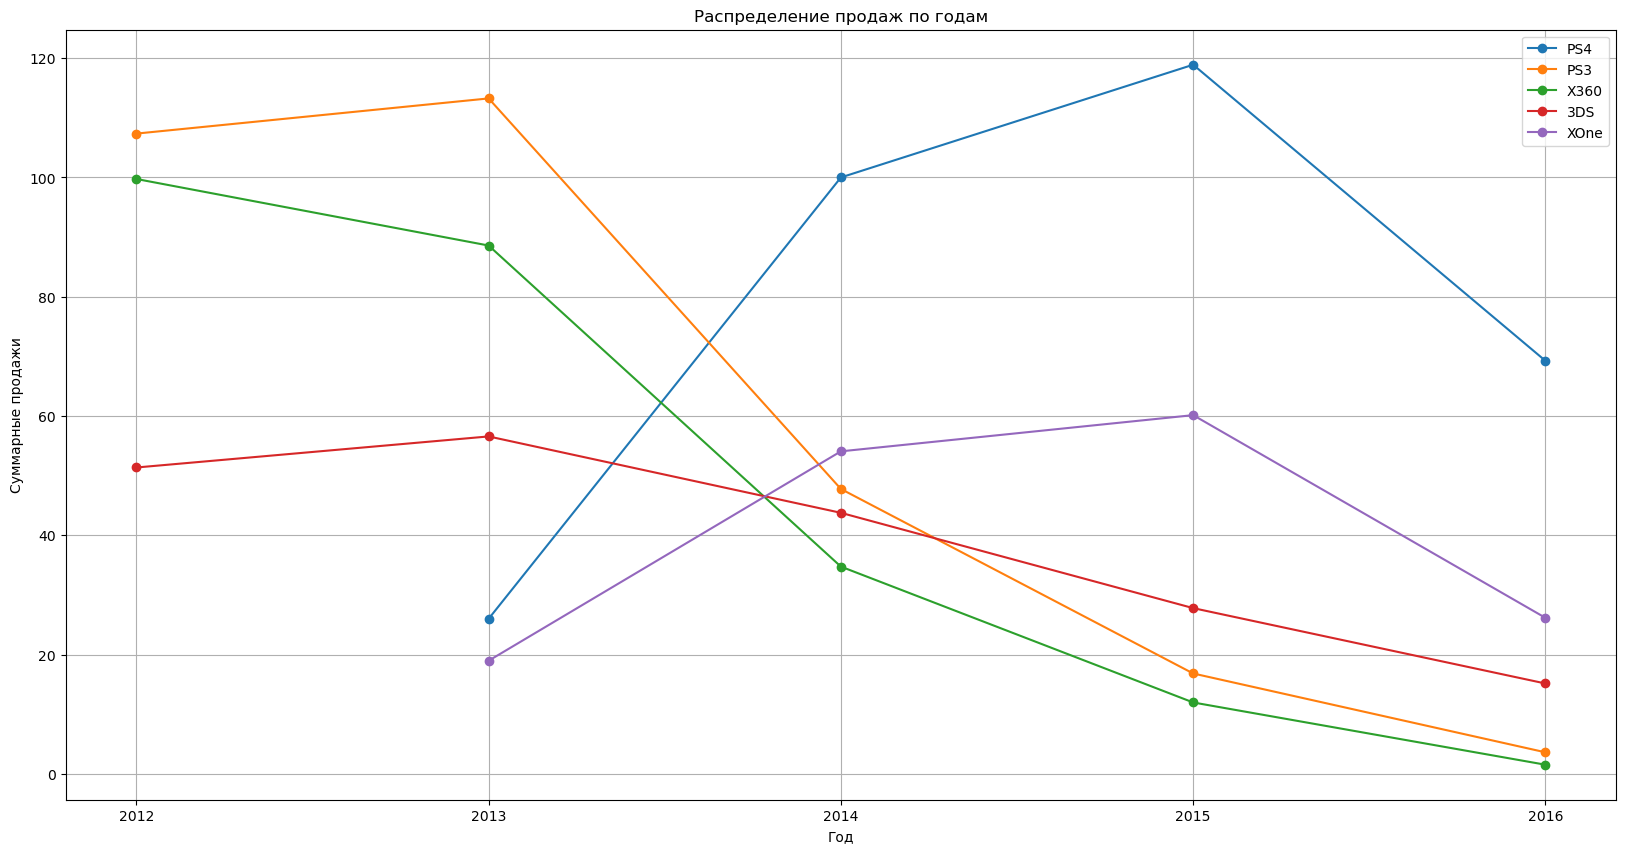

In [107]:
for name in top5_list:
    (
    data_actual.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (20, 10), label=name, style='o-', grid=True)
    )
    plt.title('Распределение продаж по годам')
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Заметна общая тенденция снижения продаж на всех платформах. Самые прибыльные платформы - PS4 и XOne, это платформы последнего поколения (вышли в 2013 году), но и у них продажи начали снижаться. 

**Выводы:**

- Топ-5 платформ по продажам, начиная с 2012 года: PS4, PS3, X360, 3DS, XOne;

- Рост продаж в период с 2012 года можно наблюдать у платформ последнего поколения PS4 и XOne;

- К самым потенциально прибыльным можно отнести PS4 - лидер по суммарным продажам и росту, XOne - из-за хорошего роста продаж, начиная с 2013 года. 

##### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Создадим диаграмму размаха из датафрейма содержащиего информацию по платформам по данным с 2012 года.

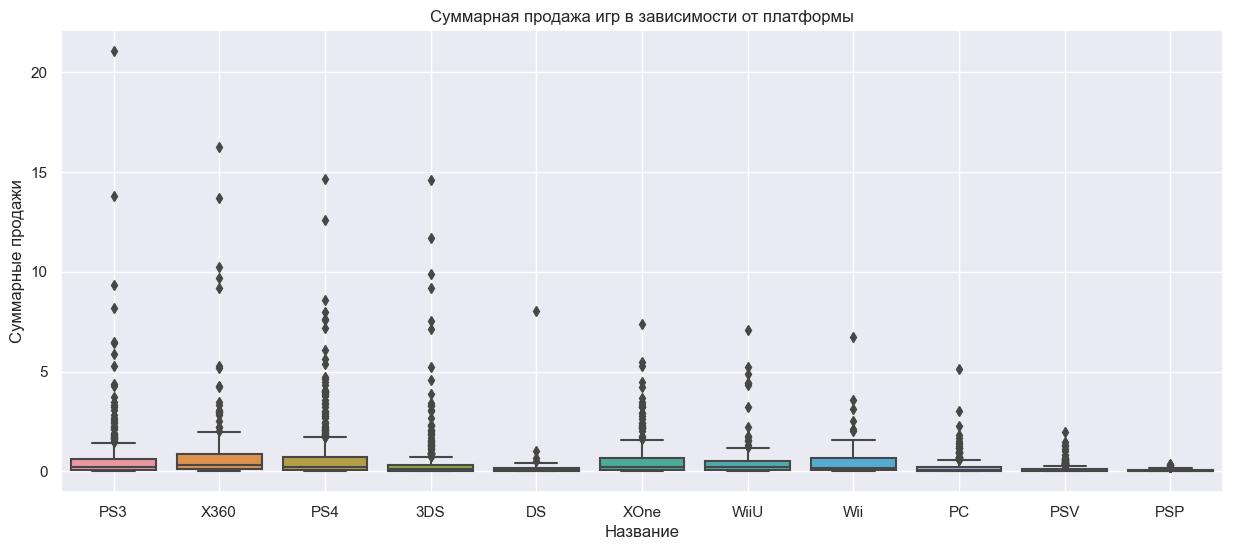

In [112]:
sns.set(rc={'figure.figsize': (15, 6)})
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.title('Суммарная продажа игр в зависимости от платформы')
plt.grid(True)
plt.xlabel('Название')
plt.ylabel('Суммарные продажи')
plt.show()


Рассмотрим диаграмму более детально.

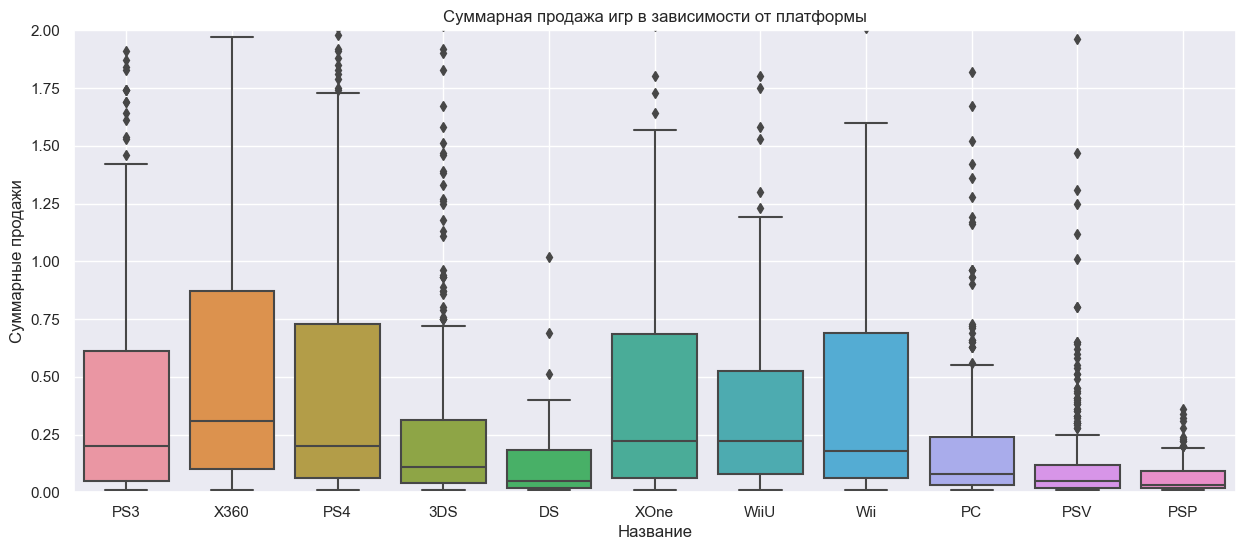

In [114]:
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.title('Суммарная продажа игр в зависимости от платформы')
plt.grid(True)
plt.ylim(0, 2)
plt.xlabel('Название')
plt.ylabel('Суммарные продажи')
plt.show()

**Выводы:**

**Исходя из первого графика можно сделать вывод:**


  - В целом продажи по платформам не превышают 2 млн. копий;
  
  
  - Существуют отдельные игры, которые продаются более 10 млн. копий;

**Из второго графика следует:**

  - Лидеры по продажам платформы X360, PS4, XOne, Wii. У этих платформ больше межквартильный размах, дальше граница 3 квартеля, больше медиана.

##### Влияние на продажи отзывы пользователей и критиков

Предлагаю построить диаграммы сразу сразу для всех ТОП-5 платформ.

**Влияние на продажи оценки пользователей**

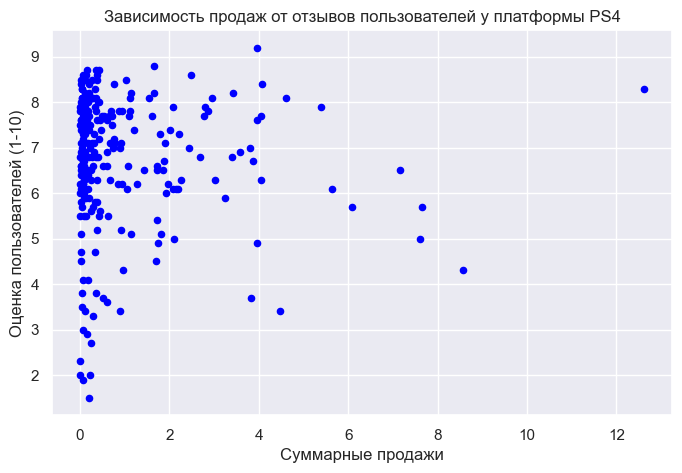

Коэффициент корреляции = -0.03195711020455645


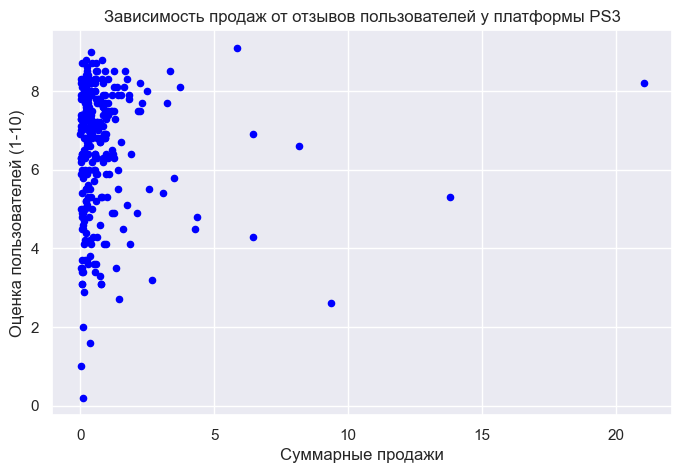

Коэффициент корреляции = -0.006205767686051523


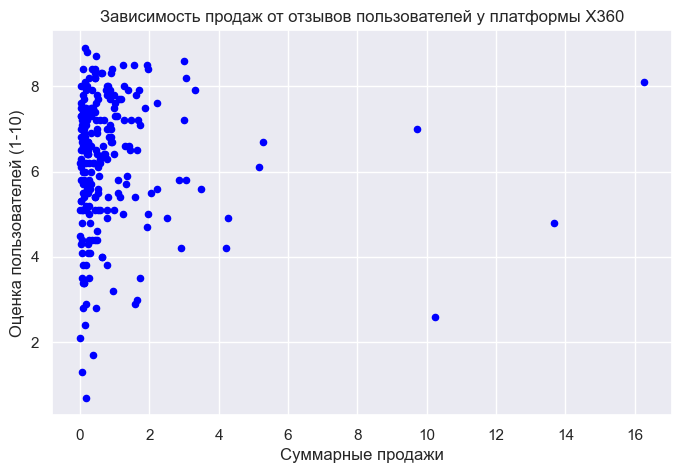

Коэффициент корреляции = 0.006163978646213358


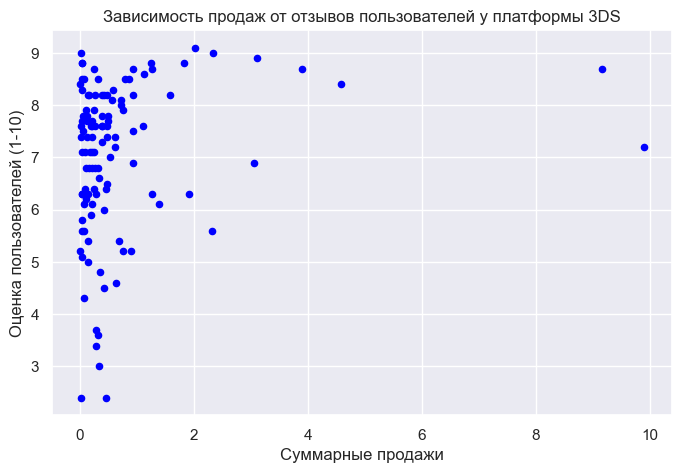

Коэффициент корреляции = 0.19758263411038599


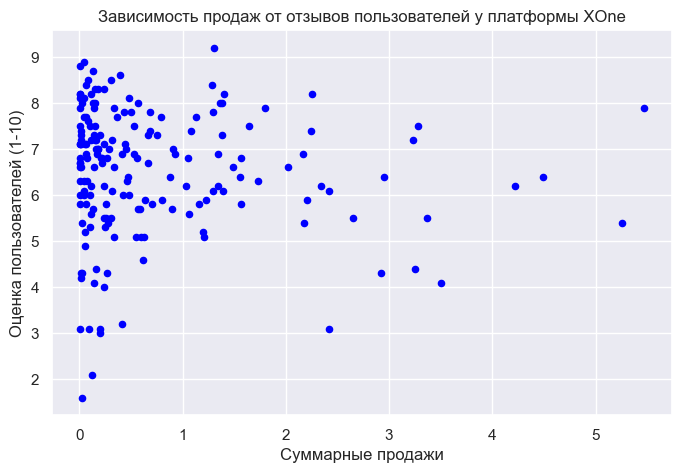

Коэффициент корреляции = -0.0689250532827942


In [119]:
for platform in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    platform_info = top5_data.loc[top5_data['platform'] == platform]
    
    platform_info.plot(x='total_sales', y='user_score', color='blue', figsize = (8, 5), kind='scatter', title=f'Зависимость продаж от отзывов пользователей у платформы {platform}')
    plt.xlabel('Суммарные продажи')
    plt.ylabel('Оценка пользователей (1-10)')
    plt.show()
    
    print('Коэффициент корреляции =', platform_info['total_sales'].corr(platform_info['user_score']))

Коэффициенты корреляции близки к нулю - связь продаж от оценок пользователей очень слабая.

**Влияние на продажи оценки критиков**

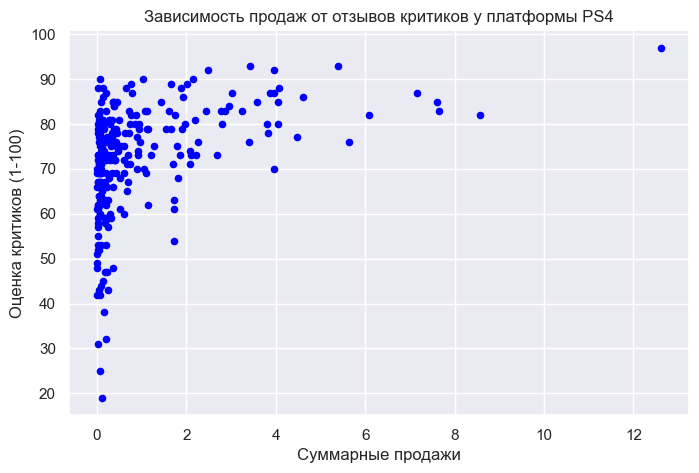

Коэффициент корреляции = 0.40656790206178145


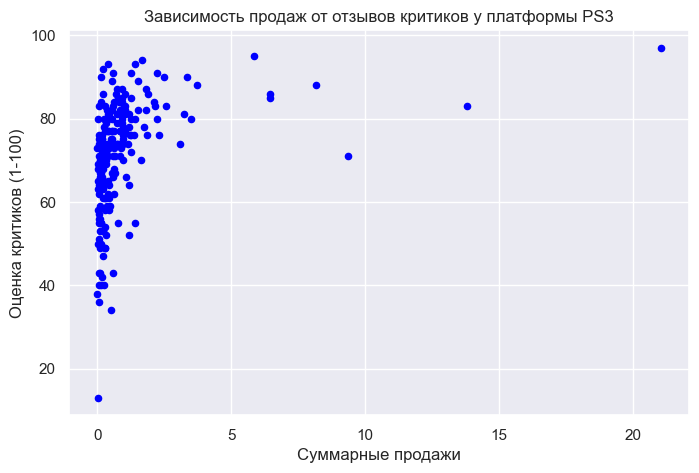

Коэффициент корреляции = 0.3341517575509857


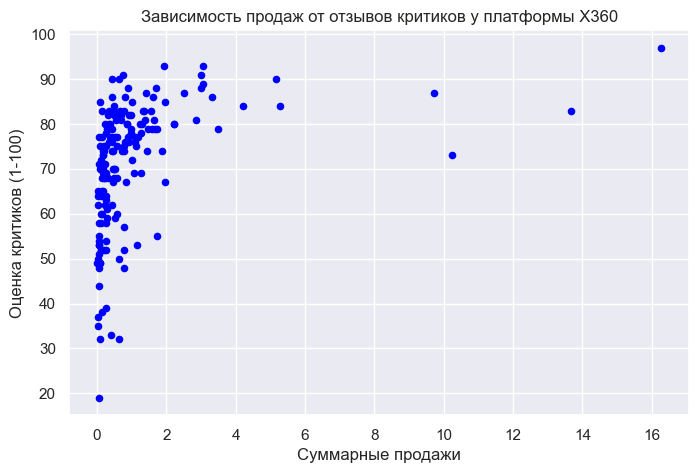

Коэффициент корреляции = 0.36057348885073387


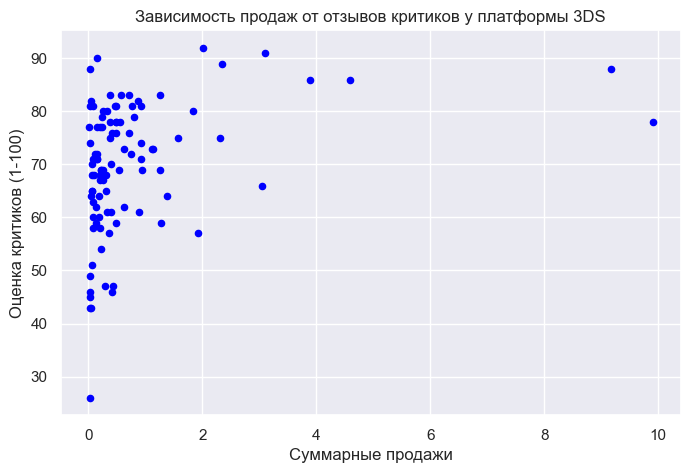

Коэффициент корреляции = 0.3208028695360786


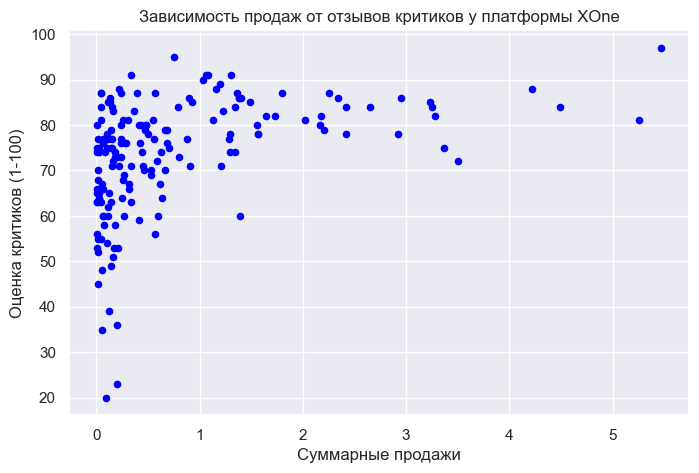

Коэффициент корреляции = 0.4169983280084016


In [122]:
for platform in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    platform_info = top5_data.loc[top5_data['platform'] == platform]
    
    platform_info.plot(x='total_sales', y='critic_score', color='blue', figsize = (8, 5), kind='scatter', title=f'Зависимость продаж от отзывов критиков у платформы {platform}')
    plt.xlabel('Суммарные продажи')
    plt.ylabel('Оценка критиков (1-100)')
    plt.show()
    
    print('Коэффициент корреляции =', platform_info['total_sales'].corr(platform_info['critic_score']))
    

Коэффициент коррелляции по ТОП-5 платформам находится в диапазоне 0,3 - 0,4. Существует слабая связь между оценками критиков и суммарными продажами игр.

**Выводы:**

**Зависимость продаж от оценок пользователей не выражена:**


  - Коэффициенты коррелляции близки к нулю - связь продаж от оценок пользователей очень слабая.;
  

**Зависимость продаж от оценок критиков слабо выражена:**

  - Коэффициент коррелляции по ТОП-5 платформам находится в диапазоне 0,3 - 0,4. Существует слабая связь между оценками критиков и суммарными продажами игр.

##### Анализ игр по жанрам

**Общее распределение игр по жанрам. Определение самого прибыльного жанра.**

Создадим сводную таблицу по жанрам из актуального датафрейма.

In [128]:
data_genre = data_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])\
.sort_values(by=[('sum', 'total_sales')], ascending=False)
data_genre.columns = ['sum', 'count']

data_genre

,sum,count
genre,,
Action,441.12,1031
Shooter,304.73,235
Role-Playing,192.80,370
Sports,181.06,267
Misc,85.04,192
Platform,61.00,85
Racing,53.50,115
Fighting,44.49,109
Simulation,35.12,80


Самые прибыльные жанры: Action, Shooter, Role-Playing, Sports.

Построим круговую диаграмму отражающую наиболее популярные жанры

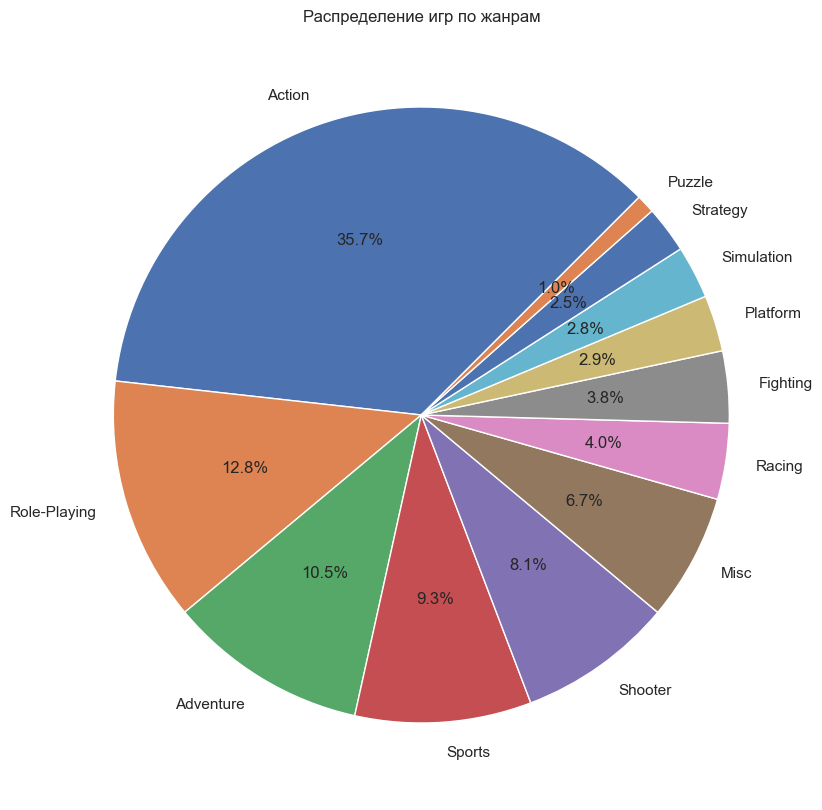

In [131]:
data_genre.sort_values(by='count', ascending=False)\
.plot.pie(y='count', autopct='%.1f%%', startangle=45, figsize=(10, 10), legend=False)
plt.title("Распределение игр по жанрам")
plt.ylabel('')
plt.show()

Самые популярные жанры: Action, Role-Playing, Adventure, Sports. 

**Сравнение медианных продаж**

In [134]:
data_genre_median = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').\
sort_values(by='total_sales', ascending=False).reset_index()
data_genre_median.columns = ['genre', 'median']

In [135]:
data_genre_median

,genre,median
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


**Построим диаграммы размаха**

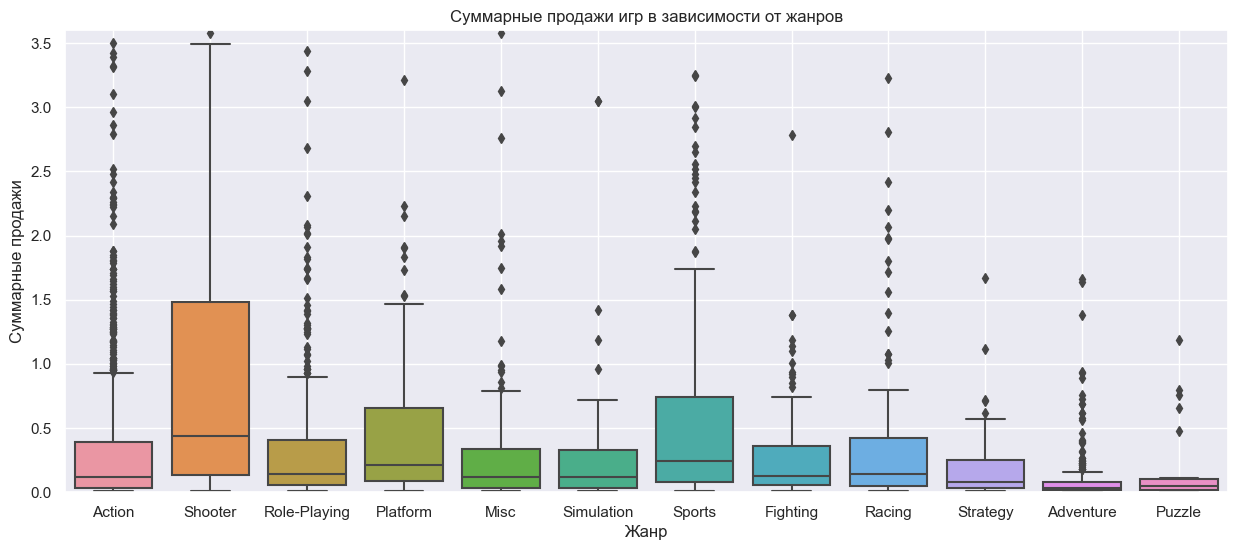

In [137]:
sns.boxplot(data=data_actual, x='genre', y='total_sales')
plt.title('Суммарные продажи игр в зависимости от жанров')
plt.grid(True)
plt.ylim(0, 3.6)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

Анализ суммарных продаж игр в зависимости от жанров по медианным значениям показывает, что предпочтения следует отдавать таким жанрам как Shooter, Sports, которые обладают большим медианным значением.

**Выводы:**

**Самые прибыльные жанры: :**


  - Action, Shooter, Sports, Role-Playing;
  

**Самые популярные жанры:**

  - Action, Role-Playing, Sports, Shooter.
  
 
**Жанры с низкими продажами:**

  - Можно выделить Strategy, Puzzle. Количество выпущенных игр у них тоже невелико: 30 и 15 соотвественно. 
  
  
**Сравнение медианных продаж**

  - Анализ суммарных продаж игр в зависимости от жанров по медианным значениям показывает, что предпочтения следует отдавать таким жанрам как Shooter, Sports, которые обладают большим медианным значением.
  
***В целом лучше обратить внимание на те жанры, которые имеют устойчивый спрос, а также входят в ТОП прибыльных и популярных жанров: Shooter и Sports.Также стоить обратить внмание на жанр Action, который лидирует по количеству продаж.***

# Выводы по 3 пункту

**Было проведенно семь исследований:**

- ***1. Сколько игр выпускалось в разные годы:***
  - С 1980 по 1994 года зарождение индустрии компьютерных игр;
  - Рост числа игр начинается с 1995 года. Пик приходится на 2008 - 2009 года;
  - С 2010 года начинается спад выпуска игр, который стабилизируется к 2012 году.
     

- ***2. Как менялись продажи по платформам:***
  - Было выделено шесть платформ по продажам за все время выпуска компьютерных игр;
  - Был определен жизненный цикл платформы: 7 лет.


- ***3. Выбор актуального периода для исследования:***
  - Для исследования был взят период 2012 - 2016 годов.
    

- ***4. Выбор несколько потенциально прибыльных платформ:***
  - Было выделено ТОП-5 платформ по продажам, начиная с 2012 года.
    

- ***5. График «ящик с усами» по глобальным продажам игр в разбивке по платформам.***
  - Построены диаграммы размаха за актуальный период, выделены лидеры продаж 4 платформы.


- ***6. Влияние на продажи отзывы пользователей и критиков:***
  - Зависимость продаж от оценок пользователей не выявлена;
  - Существует слабо выраженная связь продаж от оценок критиков.


- ***7. Анализ игр по жанрам:***
  - Стоит обратить внимание на те жанры, которые имеют устойчивый спрос, а также входят в ТОП прибыльных и популярных жанров: Shooter и Sports.Также стоить обратить внимание на жанр Action, который лидирует по количеству продаж. 

# Шаг 4. Составить портрет пользователя каждого региона

##### ТОП-5 платформ по продажам

Создаем сводные таблицы по всем регионам. Строим графики. Используем данные с 2012 года.

**Северная Америка**

In [146]:
na_sales = (
    data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

In [147]:
na_sales

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


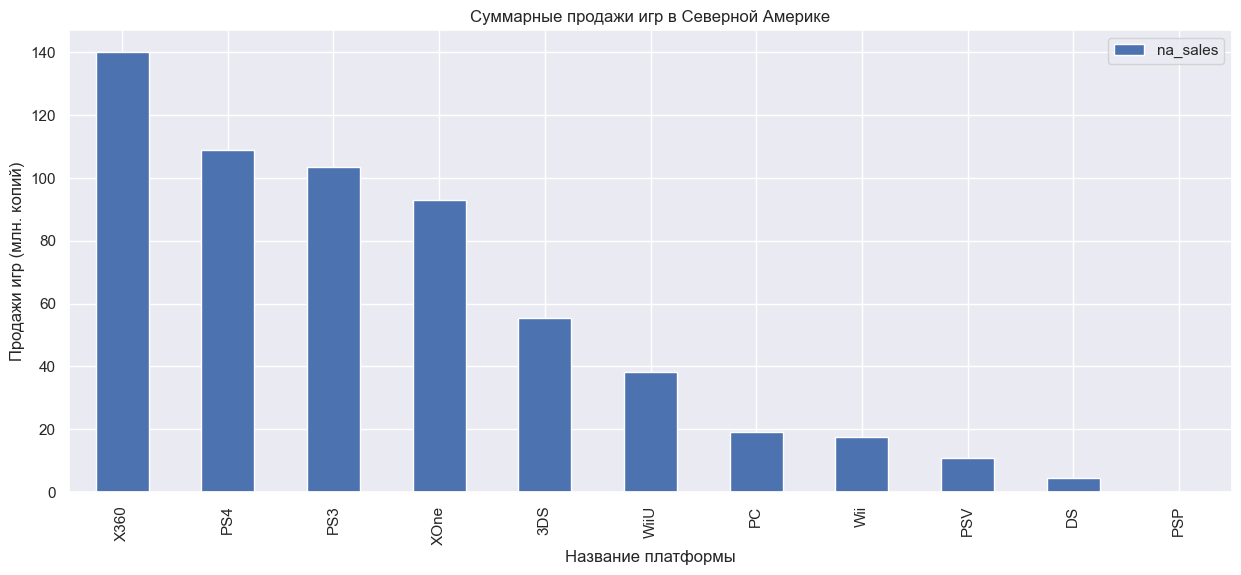

In [148]:
na_sales.plot(kind='bar', title='Суммарные продажи игр в Северной Америке')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Название платформы')
plt.show()

**Топ-5 платформ по продажам в Северной Америке:**
- X360
- PS4
- PS3
- XOne
- 3DS 

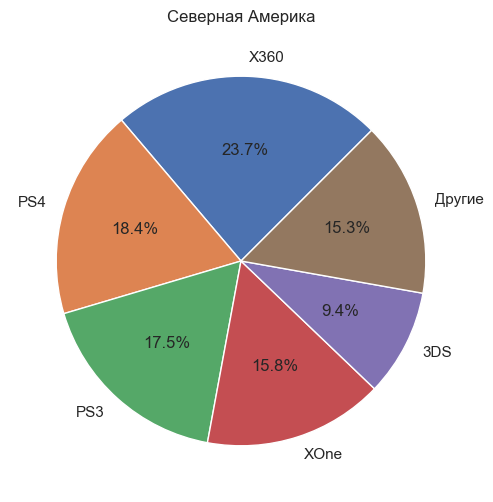

In [150]:
top_platform = na_sales.nlargest(5, 'na_sales').index
other_sales = na_sales.loc[~na_sales.index.isin(top_platform), 'na_sales'].sum()
index = list(top_platform) + ['Другие']
na_sales = [na_sales.loc[platform, 'na_sales'] for platform in top_platform] + [other_sales]

new_na_sales = pd.DataFrame({'na_sales': na_sales}, index=index)

new_na_sales.plot(kind='pie', y='na_sales', autopct='%.1f%%', startangle=45, figsize=(6, 6), legend=False)
plt.title("Северная Америка")
plt.ylabel('')
plt.show()

**Различия в долях продаж**

- Первое место с отрывом по продажам платформы у Майкрософт (т.е. из Северной Америки);

- 2 и 3 место японские Sony;

- 4 - Майкрософт (Америка);

- 5 - японская платформа Nintendo


**Европа**

In [153]:
eu_sales = (
    data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

In [154]:
eu_sales

,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


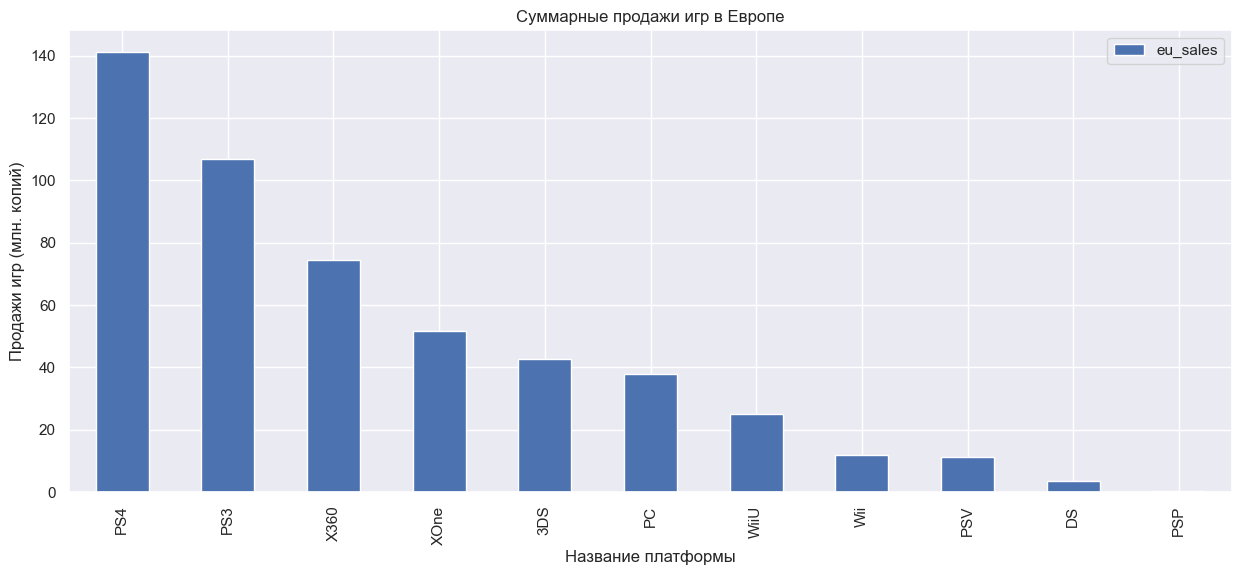

In [155]:
eu_sales.plot(kind='bar', title='Суммарные продажи игр в Европе')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Название платформы')
plt.show()

**Топ-5 платформ по продажам в Европе:**
- PS4
- PS3
- X360
- XOne
- 3DS 

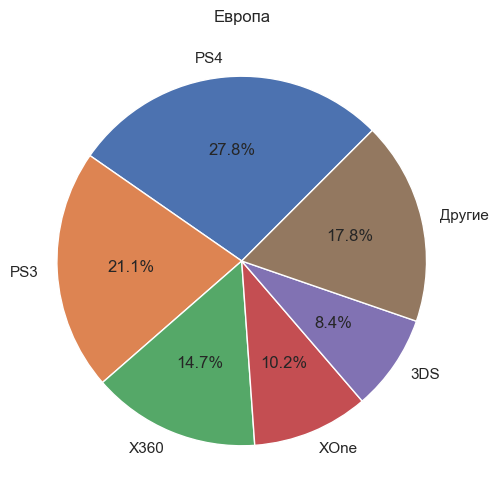

In [157]:
top_platform = eu_sales.nlargest(5, 'eu_sales').index
other_sales = eu_sales.loc[~eu_sales.index.isin(top_platform), 'eu_sales'].sum()
index = list(top_platform) + ['Другие']
eu_sales = [eu_sales.loc[platform, 'eu_sales'] for platform in top_platform] + [other_sales]

new_eu_sales = pd.DataFrame({'eu_sales': eu_sales}, index=index)

new_eu_sales.plot(kind='pie', y='eu_sales', autopct='%.1f%%', startangle=45, figsize=(6, 6), legend=False)
plt.title("Европа")
plt.ylabel('')
plt.show()

**Различия в долях продаж**

- Первое и второе место занимают японские Sony;

- На третьем и четвертом - американские платформы Майкрософт;

- На пятом - японская платформа Nintendo

***По сравнению с Северной Америкой в Европе лидируют Японские платформы.***

**Япония**

In [160]:
jp_sales = (
    data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

In [161]:
jp_sales

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


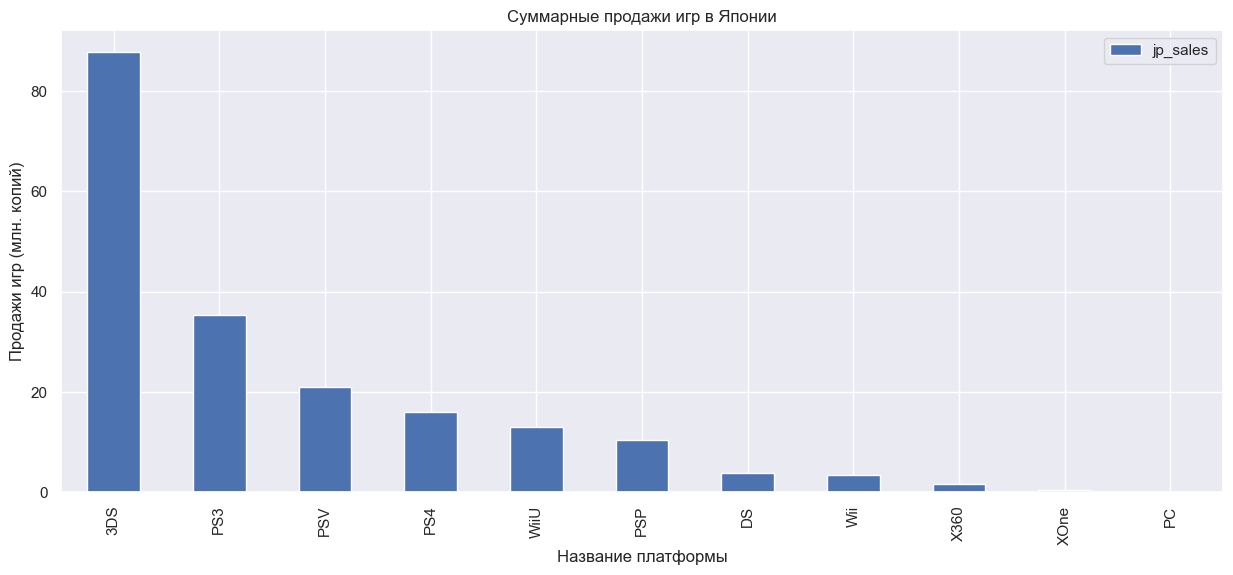

In [162]:
jp_sales.plot(kind='bar', title='Суммарные продажи игр в Японии')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Название платформы')
plt.show()

Топ-5 платформ по продажам в Японии:

- 3DS         
- PS3          
- PSV          
- PS4          
- WiiU 

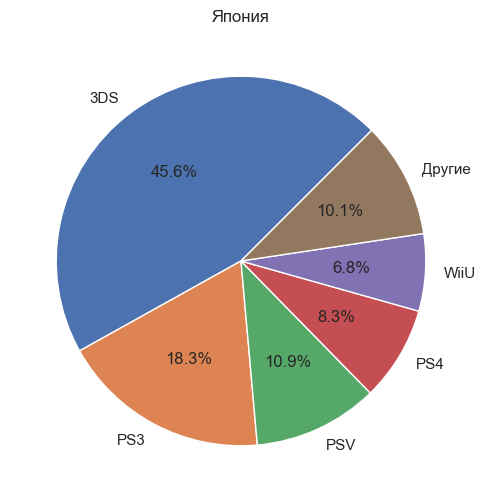

In [164]:
top_platform = jp_sales.nlargest(5, 'jp_sales').index
other_sales = jp_sales.loc[~jp_sales.index.isin(top_platform), 'jp_sales'].sum()
index = list(top_platform) + ['Другие']
jp_sales = [jp_sales.loc[platform, 'jp_sales'] for platform in top_platform] + [other_sales]

new_jp_sales = pd.DataFrame({'jp_sales': jp_sales}, index=index)

new_jp_sales.plot(kind='pie', y='jp_sales', autopct='%.1f%%', startangle=45, figsize=(6, 6), legend=False)
plt.title("Япония")
plt.ylabel('')
plt.show()

**Различия в долях продаж**

- ТОП-5 платформ занимают платформы японских производителей;

- С большим отрывом лидирует платформа Nintendo 3DS.

##### ТОП-5 платформ по жанрам

**Северная Америка**

In [168]:
na_sales = (
    data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

In [169]:
na_sales

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


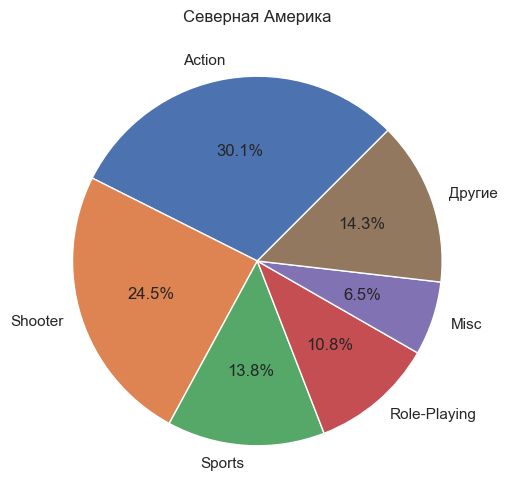

In [170]:
top_genre = na_sales.nlargest(5, 'na_sales').index
other_sales = na_sales.loc[~na_sales.index.isin(top_genre), 'na_sales'].sum()
index = list(top_genre) + ['Другие']
na_sales = [na_sales.loc[genre, 'na_sales'] for genre in top_genre] + [other_sales]

new_na_sales = pd.DataFrame({'na_sales': na_sales}, index=index)

new_na_sales.plot(kind='pie', y='na_sales', autopct='%.1f%%', startangle=45, figsize=(6, 6), legend=False)
plt.title("Северная Америка")
plt.ylabel('')
plt.show()

**Топ-5 жанров по продажам в Северной Америке:**
- Action
- Shooter
- Sports
- Role-Playing
- Misc  

***В Северной Америке лидируют Экшены и Шутеры, наименьшим спросом пользуются Пазлы и Стратегии.***

**Европа**

In [173]:
eu_sales = (
    data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

In [174]:
eu_sales

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


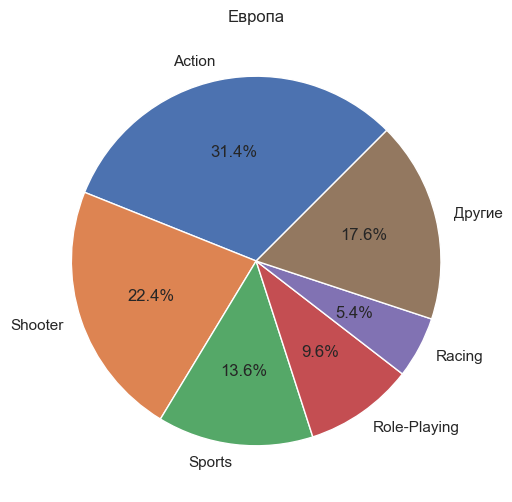

In [175]:
top_genre = eu_sales.nlargest(5, 'eu_sales').index
other_sales = eu_sales.loc[~eu_sales.index.isin(top_genre), 'eu_sales'].sum()
index = list(top_genre) + ['Другие']
eu_sales = [eu_sales.loc[genre, 'eu_sales'] for genre in top_genre] + [other_sales]

new_eu_sales = pd.DataFrame({'eu_sales': eu_sales}, index=index)

new_eu_sales.plot(kind='pie', y='eu_sales', autopct='%.1f%%', startangle=45, figsize=(6, 6), legend=False)
plt.title("Европа")
plt.ylabel('')
plt.show()

Топ-5 жанров по продажам в Европе:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

***В Европе также лидируют Экшены и Шутеры, наименьшим спросом пользуются Пазлы и Стратегии. В ТОП-5 в отличие от Северной Америки входят гонки.***

**Япония**

In [178]:
jp_sales = (
    data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

In [179]:
jp_sales

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


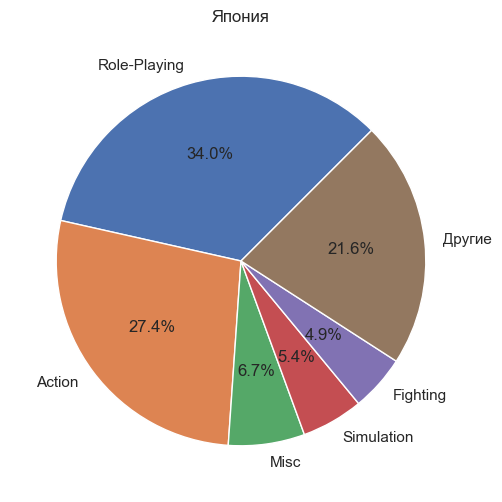

In [180]:
top_genre = jp_sales.nlargest(5, 'jp_sales').index
other_sales = jp_sales.loc[~jp_sales.index.isin(top_genre), 'jp_sales'].sum()
index = list(top_genre) + ['Другие']
jp_sales = [jp_sales.loc[genre, 'jp_sales'] for genre in top_genre] + [other_sales]

new_jp_sales = pd.DataFrame({'jp_sales': jp_sales}, index=index)

new_jp_sales.plot(kind='pie', y='jp_sales', autopct='%.1f%%', startangle=45, figsize=(6, 6), legend=False)
plt.title("Япония")
plt.ylabel('')
plt.show()

Топ-5 жанров по продажам в Японии:
- Role-Playing
- Action
- Misc
- Simulation
- Fighting

***Рынок Японии заметно отличается от Северной Америки и Европы. Большую долю продаж в Японии занимают Role-Playing, Action. Остальные жанры не выделяются.***

##### Влияние на продажи рейтинга ESRB 

**Северная Америка**

In [184]:
na_sales = (
    data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

In [185]:
na_sales

,na_sales
rating,
M,231.57
E,114.37
без рейтинга ESRB,103.31
E10+,75.70
T,66.02


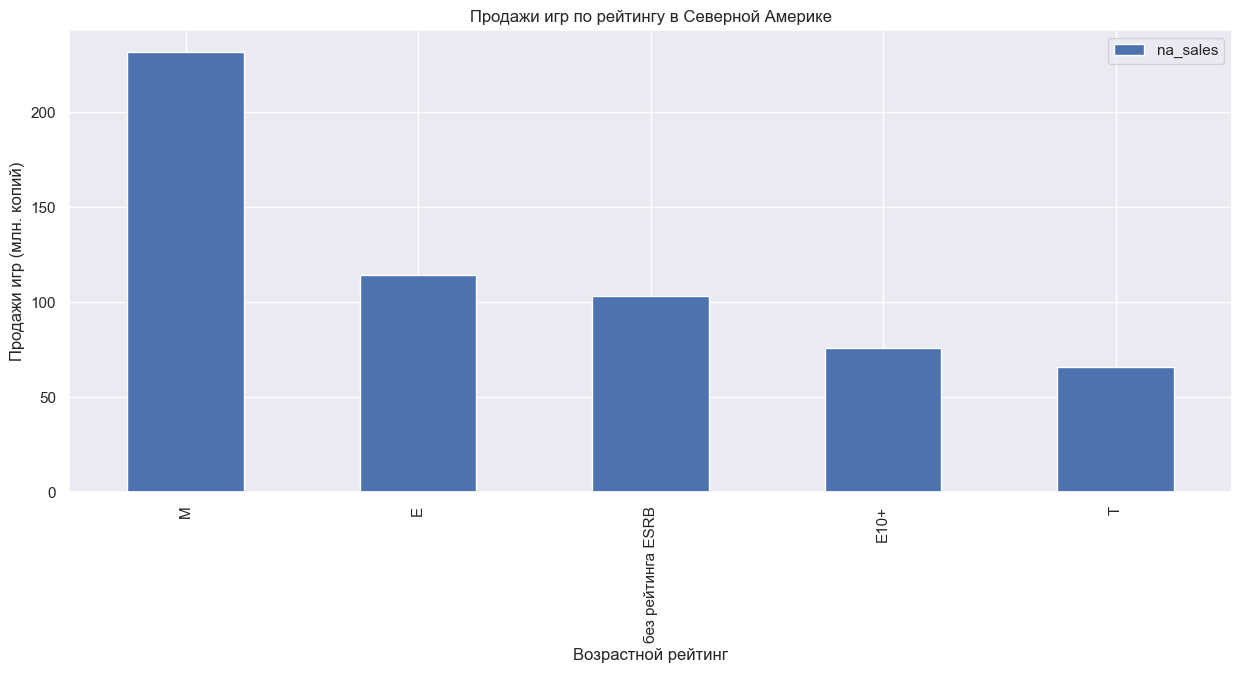

In [186]:
na_sales.plot(kind='bar', title='Продажи игр по рейтингу в Северной Америке')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Возрастной рейтинг')
plt.show()

***В Северной Америке с большим отрывом лидируют игры с рейтингом М "Для взрослых".***

**Европа**

In [189]:
eu_sales = (
    data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

In [190]:
eu_sales

,eu_sales
rating,
M,193.96
E,113.02
без рейтинга ESRB,91.50
E10+,55.37
T,52.96


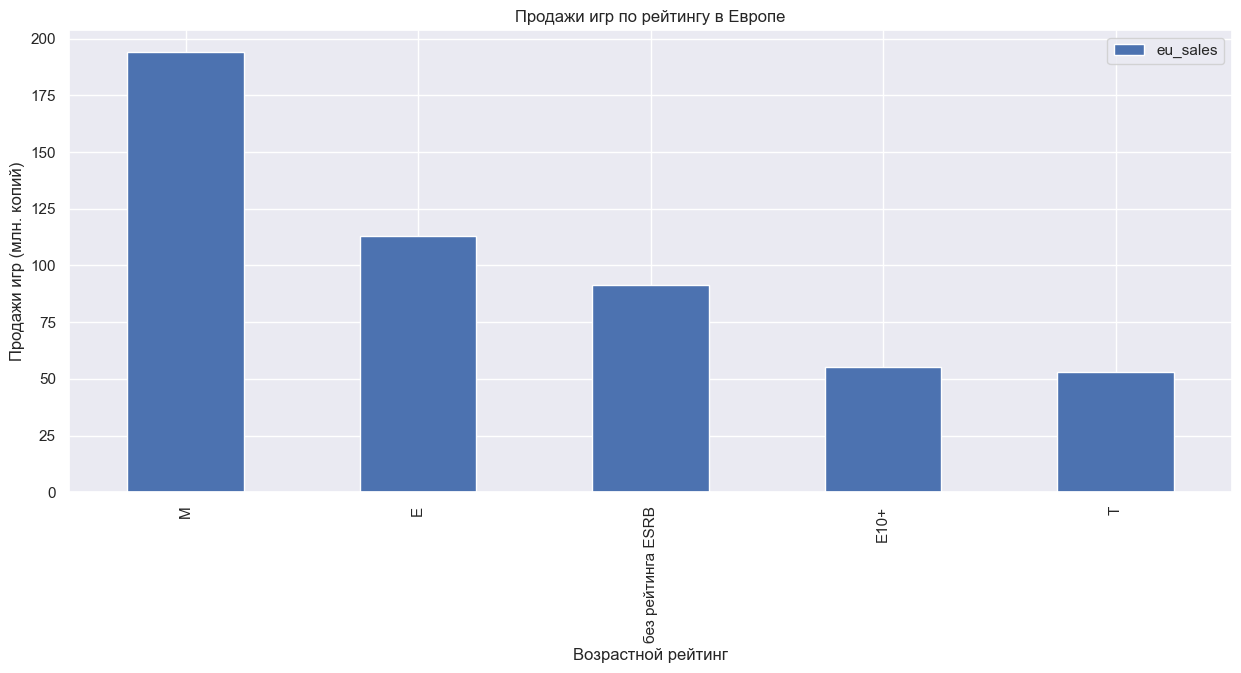

In [191]:
eu_sales.plot(kind='bar', title='Продажи игр по рейтингу в Европе')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Возрастной рейтинг')
plt.show()

***В Европе похожая ситуация: лидируют игры "Для взрослых".***

**Япония**

In [194]:
jp_sales = (
    data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

In [195]:
jp_sales

,jp_sales
rating,
без рейтинга ESRB,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


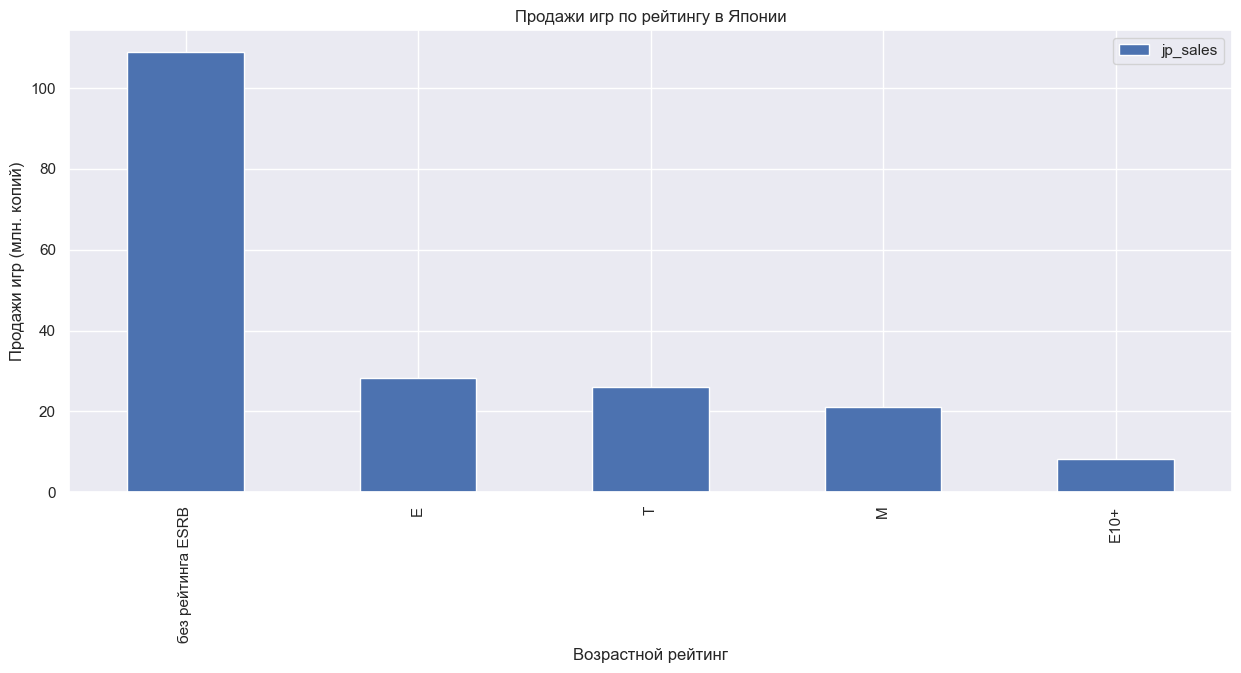

In [196]:
jp_sales.plot(kind='bar', title='Продажи игр по рейтингу в Японии')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Возрастной рейтинг')
plt.show()

***В Японии лидируют игры без рейтинга ESRB. Причины: рейтинг ESRB - американский рейтинг, в Японии существует свое рейтинговое агентство (CERO).***

***Таким образом, игры без рейтинга ESRB, которые являются лидерами продаж в Японии, это японские компьютерные игры.***

# Выводы по 4 пункту

**Северная Америка и Европа похожие рынки**

- ***Отличиями являются:***
  - В Северной Америке лидируют платформы у Майкрософт;
  - В Европе более популярны японские платформы;
  - В Европе в ТОП-5 жанров оказались гонки, которые не так популярны а Северной Америке.
     

**Япония - отличающийся рынок**
  - ТОП-5 платформ по продпжам занимают платформы японских производителей. С большим отрывом лидирует платформа Nintendo 3DS;
  - Большую долю продаж по жанрам в Японии занимают Role-Playing, Action. Остальные жанры не выделяются;
  - Игры без рейтинга ESRB, которые являются лидерами продаж в Японии, это японские компьютерные игры.

# Шаг 5. Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC;


**Альтернативная гипотеза:** средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу PC.


**Формулирование гипотез:**

  - нулевая гипотеза формулируется через равенство;
  - альтернативная через неравенство, в данном случае двусторонее.
  
**Критерий для проверки гипотез:**

- Если, в ходе эксперимента отвергается нулевая гипотеза, принимается альтернативная.

Для проверки гипотез будут использоваться данные с 2012 года. Уровень статистической значимости принимаем 5%.

In [204]:
xone = data_actual.query('(platform == "XOne")')['user_score']
pc = data_actual.query('(platform == "PC")')['user_score']

alpha = 0.05


results = st.ttest_ind(xone, pc, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.
- Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC.

##### Средние пользовательские рейтинги жанров Action и Sports  разные

**Нулевая гипотеза:** средний пользовательский рейтинг жанров Action равен среднему пользовательскому рейтингу Sports;


**Альтернативная гипотеза:** средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу Sports.


**Формулирование гипотез:**

  - нулевая гипотеза формулируется через равенство;
  - альтернативная через двусторонее неравенство.
  
**Критерий для проверки гипотез:**

- Если, в ходе эксперимента отвергается нулевая гипотеза, принимается альтернативная.

In [208]:
action = data_actual.query('(genre == "Action")')['user_score']
sports = data_actual.query('(genre == "Sports")')['user_score']

alpha = 0.05


results_2 = st.ttest_ind(action, sports, nan_policy='omit')

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.804523380462917e-26
Отвергаем нулевую гипотезу


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
- Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу Sports.

# Выводы по 5 пункту

**1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**


**Нулевая гипотеза:** средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC;

**Альтернативная гипотеза:** средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу PC.

**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.
- Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC.

**2) Средние пользовательские рейтинги жанров Action и Sports разные;**


**Нулевая гипотеза:** средний пользовательский рейтинг жанров Action равен среднему пользовательскому рейтингу Sports;

**Альтернативная гипотеза:** средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу Sports.

**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
- Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу Sports.

# Шаг 6. Общий вывод

**В ходе исследования успешности продажи компьютерных игр были выполнены следующие этапы и сделаны выводы:**

--- 
**Общая информация:**

  - Были проанализированны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

    - всего в датафрейме 16715 строк и 11 колонок. Обнаружены пропуски в шести колонках:Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;

    - название колонок имеют нарушение стиля. Их необходимо привести к виду snake_case;

    - неверный тип данных в столбцах Year_of_Release, User_Score.

--- 
**Предобработка данных:**

   -  название столбцов были приведены к нижнему регистру;
    
   - типы данных в двух столбцах: year_of_release и user_score были изменены на верные;

   - проанализировали пропуски в пяти столбцах: name, genre, critic_score, user_score, rating. Пропуски в столбцах name и genre удалили, так как их менее 1 процента. Пропуски в стобце rating заменили на "без рейтинга ESRB", так как эти данные имеют большое количесво пропусков и удалять их нельзя и в дальнейшем участвуют в исследовательском анализе. Пропуски в столбцах critic_score, user_score оставили без изменений.
    
   - проверили данные на явные дубликаты. Обработали данные на неявные дубликаты в столбцах name, platform, year_of_release.
    
   - добавлен новый столбец total_sales в датафрейм data с суммарными продажами во всех регионах.
   
--- 
**Исследовательский анализ данных:**  

  ***Было проведенно семь исследований:***

- ***1. Сколько игр выпускалось в разные годы:***
  - С 1980 по 1994 года зарождение индустрии компьютерных игр;
  - Рост числа игр начинается с 1995 года. Пик приходится на 2008 - 2009 года;
  - С 2010 года начинается спад выпуска игр, который стабилизируется к 2012 году.
     

- ***2. Как менялись продажи по платформам:***
  - Было выделено шесть платформ по продажам за все время выпуска компьютерных игр;
  - Был определен жизненный цикл платформы: 7 лет.


- ***3. Выбор актуального периода для исследования:***
  - Для исследования был взят период 2012 - 2016 годов.
    

- ***4. Выбор несколько потенциально прибыльных платформ:***
  - Было выделено ТОП-5 платформ по продажам, начиная с 2012 года.
    

- ***5. График «ящик с усами» по глобальным продажам игр в разбивке по платформам.***
  - Построены диаграммы размаха за актуальный период, выделены лидеры продаж 4 платформы.


- ***6. Влияние на продажи отзывы пользователей и критиков:***
  - Зависимость продаж от оценок пользователей не выявлена;
  - Существует слабая связь между оценками критиков и суммарными продажами игр.


- ***7. Анализ игр по жанрам:***
  - Стоит обратить внимание на те жанры, которые имеют устойчивый спрос, а также входят в ТОП прибыльных и популярных жанров: Shooter и Sports.Также стоить обратить внимание на жанр Action, который лидирует по количеству продаж.  
  
--- 
**Составлен портрет пользователя каждого региона:**    

***Северная Америка и Европа похожие рынки***

- ***Отличиями являются:***
  - В Северной Америке лидируют платформы у Майкрософт;
  - В Европе более популярны японские платформы;
  - В Европе в ТОП-5 жанров оказались гонки, которые не так популярны а Северной Америке.
     

- ***Япония - отличающийся рынок***
  - ТОП-5 платформ по продажам занимают платформы японских производителей. С большим отрывом лидирует платформа Nintendo 3DS;
  - Большую долю продаж по жанрам в Японии занимают Role-Playing, Action. Остальные жанры не выделяются;
  - Игры без рейтинга ESRB, которые являются лидерами продаж в Японии, это японские компьютерные игры.
  
  
--- 
**Проверка гипотез:** 

**1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.
- Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC.

**2) Средние пользовательские рейтинги жанров Action и Sports разные;**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
- Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу Sports.


--- 
**На основе проведенных исследований успешности продажи компьютерных игр, предлагаю следующие рекомендации для планирования рекламной кампании на 2017 год:**

--- 
**Северная Америка:** 

- **Платформы:** потенциально прибыльные платформы X360 и PS4;
- **Жанры:** самые востребованные жанры Action, Shooter, Sports;
- **Рейтинг ESRB:** В Северной Америке с большим отрывом лидируют игры с рейтингом М "Для взрослых".

--- 
**Европа:** 

- **Платформы:** в Европе популярны японские платформы PS4 и PS3;
- **Жанры:** в Европе, как и в Северной Америке лидируют Action, Shooter, Sports;
- **Рейтинг ESRB:** как и в Северной Америке потенциально прибыльные игры с рейтингом М "Для взрослых".

--- 
**Япония:** 

- **Платформы:**  ТОП-5 платформ занимают платформы японских производителей. Основную ставку стоит сделать на лидера продаж платформу Nintendo 3DS.;
- **Жанры:** самые востребованные жанры Role-Playing и Action;
- **Рейтинг ESRB:** стоит рекламировать игры без возрастного рейтинга ESRB т.е. игры произведенные в Японии.

--- 
**Рекомендации для всех регионов:** 

- Рекламировать игры, получившие высокие оценки критиков.
